## Assignment 1
### Name: SAIKAT MOI
### Roll Number: 20CS10050

In [1]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../../dataset/linear-regression.csv')
print(data) 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
X = data.drop(columns=['quality'])
y = data['quality']

In [4]:
# Feature scaling is a common preprocessing step in machine learning that helps improve the performance and convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)


In [6]:
print("Train set shapes - X:", X_train.shape, "y:", y_train.shape)
print("Validation set shapes - X:", X_val.shape, "y:", y_val.shape)
print("Test set shapes - X:", X_test.shape, "y:", y_test.shape)

Train set shapes - X: (799, 11) y: (799,)
Validation set shapes - X: (480, 11) y: (480,)
Test set shapes - X: (320, 11) y: (320,)


In [7]:
# concatenating the column vector of ones with the X_train matrix, effectively adding a new column to the beginning of X_train
# bias term allows the model to learn an offset from the origin.

X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

In [8]:
# Normal Equation θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train

In [9]:
# Predict on the test set
X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test_pred = X_test_with_bias @ theta

# Calculate R-squared on the test set

ssr = np.sum(( y_test-y_test_pred ) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (ssr / sst)

# RMSE = sqrt((1 / n) * Σ(y_pred - y_actual)^2)
# Calculate RMSE on the test set

rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

print("Test Set - R-squared:", r2)
print("Test Set - Root Mean Squared Error (RMSE):", rmse)


Test Set - R-squared: 0.3967805084557149
Test Set - Root Mean Squared Error (RMSE): 0.6657115962476505


In [10]:
# the mean squared error loss between the predicted values and the actual target values.
def compute_loss(X, y, theta):
    y_pred = X @ theta
    loss = np.mean((y_pred - y) ** 2)
    return loss


In [11]:
# ∇(MSE) = -2 * (X^T @ (y - Xθ)) / N

def gradient_ascent(X, y, theta, learning_rate, num_iterations):
    losses = []
    for _ in range(num_iterations):
        y_pred = X @ theta
        gradient = -2 * (X.T @ (y - y_pred)) / len(y)
        theta -= learning_rate * gradient
        loss = compute_loss(X, y, theta)
        losses.append(loss)
    return theta, losses

Learning Rate: 0.01
Test Set - R-squared: 0.3967805084557158
Test Set - Root Mean Squared Error (RMSE): 0.6657115962476501

Learning Rate: 0.001
Test Set - R-squared: 0.3967803979339991
Test Set - Root Mean Squared Error (RMSE): 0.6657116572333991

Learning Rate: 0.0001
Test Set - R-squared: 0.39639733535434873
Test Set - Root Mean Squared Error (RMSE): 0.6659229971434986



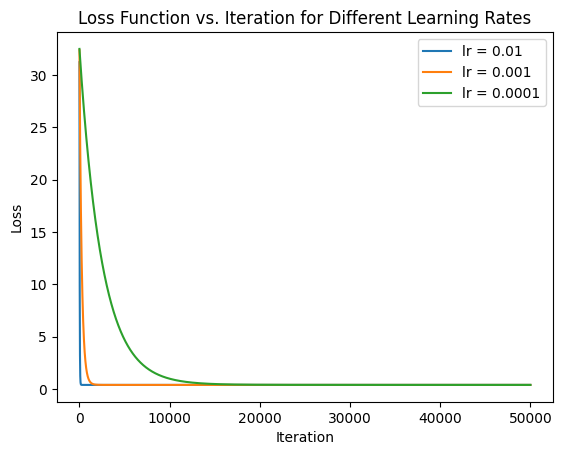

In [12]:
learning_rates = [0.01, 0.001, 0.0001]
num_iterations = 50000

for lr in learning_rates:
    theta_initial = np.zeros(X_train.shape[1] + 1)  # +1 for the bias term
    X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta_optimized, losses = gradient_ascent(X_train_with_bias, y_train, theta_initial, lr, num_iterations)
    
    plt.plot(range(num_iterations), losses, label=f'lr = {lr}')

    X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    y_test_pred = X_test_with_bias @ theta_optimized

    # Calculate R-squared on the test set
    ssr = np.sum(( y_test-y_test_pred ) ** 2)
    sst = np.sum((y_test - np.mean(y_test)) ** 2)
 
    r2 = 1-(ssr / sst)

    # Calculate RMSE on the test set
    rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    print(f"Learning Rate: {lr}")
    print("Test Set - R-squared:", r2)
    print("Test Set - Root Mean Squared Error (RMSE):", rmse)
    print()

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function vs. Iteration for Different Learning Rates')
plt.legend()
plt.show()
